In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input

In [2]:
# Load files
data_0_500 = pd.read_csv('data/prices0to500.csv')
data_0_250 = pd.read_csv('data/prices0to250.csv')
data_250_500 = data_0_500[250:500]

data_0_250.columns = [int(i) for i in data_0_250.columns]
data_250_500.columns = [int(i) for i in data_250_500.columns]
data_0_500.columns = [int(i) for i in data_0_500.columns]

In [3]:
# Testing on all data, one model.

# Normalize data
scaler = StandardScaler()
data_scaled_full = scaler.fit_transform(data_0_500.values)

# Splitting the scaled data into training and testing datasets
data_train = data_scaled_full[:250].T
data_test = data_scaled_full[250:].T

In [8]:
model = Sequential([
    Input(shape=(250, 1)),
    LSTM(250, return_sequences=True, activation='sigmoid'),
    # Dropout(0.2),
    Dense(1),
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(data_train, data_test, epochs=100, batch_size=32)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 1.1930
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 1.1057
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 1.0136
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 1.0137
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 1.0284
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 1.0265
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.9915
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.9965
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.9727
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - loss: 0.9797
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.9662
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.9583
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.9557
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - loss: 0.9528
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.9526
Epoc

In [9]:
# Predict
predictions = model.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
predictions_transposed.index = [i for i in range(250, 500)]
predictions_transposed.columns = [i for i in range(50)]
# predictions_transposed.head(2)

data_train_t = pd.DataFrame(data_train.T)
data_train_t.head()
data_train_t.head(2)

predicted_full = pd.concat([data_train_t, predictions_transposed], axis='rows')
# print(predicted_full.shape)
# predicted_full.head(2)

data_scaled_full = pd.DataFrame(data_scaled_full)
data_scaled_full.index = [i for i in range(500)]
data_scaled_full.columns = [i for i in range(50)]
# data_scaled_full.head(2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step


In [10]:
predicted_full

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.515538,0.670101,1.950758,1.227271,-1.960603,1.982375,2.680726,0.732795,1.627832,-0.070253,...,1.283144,-0.957301,2.084182,-1.003912,0.119468,0.209860,-1.806259,2.043383,2.027493,-0.028567
1,-0.488799,0.785359,2.048506,1.217512,-1.983695,1.903666,2.580549,0.835538,2.037908,-0.079615,...,1.127392,-0.930466,2.062889,-0.545081,0.074608,0.156912,-1.834870,2.100377,1.985510,-0.037064
2,-0.502169,0.849392,1.983340,1.276064,-2.133795,1.651796,2.680726,0.946184,1.815784,-0.266872,...,1.075474,-0.883187,2.126767,-0.951172,0.234822,0.037778,-1.773247,2.237162,1.912040,-0.190011
3,-0.421954,0.890372,1.885592,1.339496,-2.214618,1.447151,2.613941,1.546836,1.713265,-0.160760,...,1.218247,-0.885742,2.020303,-1.114664,0.266864,-0.081355,-1.786452,2.259960,2.027493,0.013918
4,-0.274895,0.757185,1.853010,1.290703,-2.035653,1.384184,2.380196,1.657482,1.952476,-0.226300,...,1.283144,-0.885742,1.977718,-0.966994,0.324541,-0.028407,-1.705021,2.271358,1.801836,-0.190011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.688243,-0.127601,0.044696,-0.151860,-0.285852,-0.408421,-0.166754,-0.223863,0.454639,-0.000145,...,0.047725,-0.310157,-0.049614,0.270673,-0.237617,-0.132267,0.241794,0.496960,-0.326697,0.496742
496,-0.714987,-0.123519,0.053074,-0.155920,-0.305597,-0.386878,-0.168711,-0.234730,0.470001,0.008779,...,0.034919,-0.322064,-0.054169,0.326721,-0.222436,-0.185340,0.221842,0.486798,-0.356074,0.485601
497,-0.716159,-0.124542,0.063996,-0.156671,-0.326636,-0.374375,-0.164357,-0.212743,0.480233,0.011147,...,0.022607,-0.333659,-0.069532,0.342677,-0.230200,-0.219617,0.226568,0.484846,-0.349649,0.508210
498,-0.708473,-0.111484,0.060471,-0.153788,-0.366049,-0.343671,-0.163933,-0.188096,0.453820,-0.010171,...,-0.010865,-0.346130,-0.061100,0.371307,-0.223319,-0.212332,0.213501,0.492722,-0.357714,0.479856


Text(0.5, 1.0, 'Stock Price Prediction')

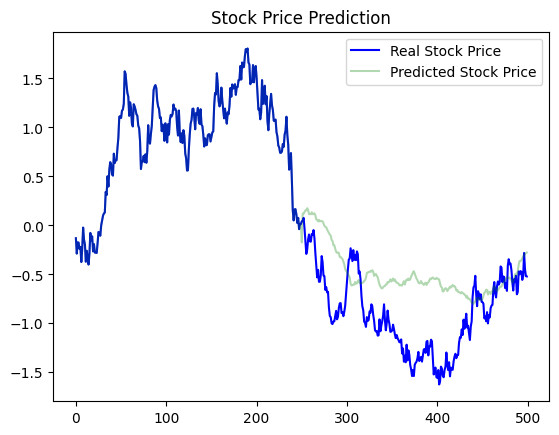

In [11]:
stock_number = 10
plt.plot(data_scaled_full[stock_number], color='blue', label='Real Stock Price')
plt.plot(predicted_full[stock_number], color='green', label='Predicted Stock Price', alpha = 0.3)
plt.legend()
plt.title('Stock Price Prediction')

In [12]:
# The journey to find similar stocks, as similar stocks works well with one model.

statistical_data = pd.DataFrame()
statistical_data.index = ['mean', 'variance', 'std', 'skewness', 'kurtosis', 'median', 'min', 'max', '25%', '50%', '75%']
for i in range(50):
    avg = data_0_500[i].mean()
    std = data_0_500[i].std()
    statistical_data[i] = [avg, std, std**2, data_0_500[i].skew(), data_0_500[i].kurt(), data_0_500[i].median(), data_0_500[i].min(), data_0_500[i].max(), data_0_500[i].quantile(0.25), data_0_500[i].quantile(0.5), data_0_500[i].quantile(0.75)]

In [13]:
statistical_data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean,13.845620,69.033740,47.262580,48.004780,55.496120,11.740700,18.177200,46.782800,68.537300,50.185100,...,31.651400,63.251640,12.502360,60.843540,36.523580,52.461460,57.537160,34.427360,41.273040,56.123620
variance,0.748745,3.908187,0.614438,2.051494,1.733916,0.635884,0.299771,1.266560,0.585843,3.207362,...,0.771223,7.833634,0.940225,1.898022,1.561982,0.756214,4.548284,0.878169,3.814908,1.178059
std,0.560619,15.273926,0.377534,4.208629,3.006465,0.404349,0.089863,1.604175,0.343212,10.287172,...,0.594784,61.365825,0.884024,3.602488,2.439787,0.571859,20.686886,0.771180,14.553524,1.387822
skewness,0.430390,-0.105479,0.607391,0.037878,-0.294379,-0.953175,0.503840,0.616619,0.139749,0.774150,...,0.088064,-0.022540,0.588317,0.289168,-1.100800,0.019868,0.500165,0.284235,-0.486265,-0.007155
kurtosis,-1.148061,-1.456631,-0.940508,-1.491674,-0.716192,0.364842,-0.435913,0.641224,-0.497690,-0.120372,...,-1.145991,-1.378724,-0.771744,-0.415863,0.892211,0.155982,-1.155711,-0.521551,0.289093,-0.587280
median,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.690000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000
min,12.630000,62.470000,46.330000,44.900000,51.660000,10.020000,17.650000,44.010000,67.260000,45.260000,...,30.270000,50.620000,10.630000,56.260000,31.760000,50.210000,49.200000,32.800000,31.640000,53.470000
max,15.560000,75.150000,48.610000,51.010000,59.120000,13.000000,18.980000,51.090000,69.990000,59.100000,...,33.260000,77.470000,14.500000,66.090000,39.130000,54.150000,66.600000,36.480000,50.020000,59.310000
25%,13.207500,65.517500,46.820000,45.750000,54.000000,11.480000,17.970000,45.917500,68.110000,47.597500,...,30.950000,55.865000,11.817500,59.420000,35.837500,52.050000,54.062500,33.800000,39.615000,55.317500
50%,13.590000,68.255000,46.975000,47.830000,55.880000,11.850000,18.100000,46.690000,68.550000,49.535000,...,31.590000,64.615000,12.210000,60.750000,36.825000,52.375000,55.425000,34.350000,41.665000,56.100000


In [14]:
only_variance = statistical_data.loc['variance']
lower = only_variance.min()
upper = only_variance.max()

# Find similar stocks
# 5 groups
cutoff1 = 1
cutoff2 = 2.25
cutoff3 = 4
cutoff4 = 6
cutoff5 = 12

group1 = [i for i in range(50) if only_variance[i] < cutoff1]
group2 = [i for i in range(50) if cutoff1 <= only_variance[i] < cutoff2]
group3 = [i for i in range(50) if cutoff2 <= only_variance[i] < cutoff3]
group4 = [i for i in range(50) if cutoff3 <= only_variance[i] < cutoff4]
group5 = [i for i in range(50) if cutoff4 <= only_variance[i] < cutoff5]

<Axes: >

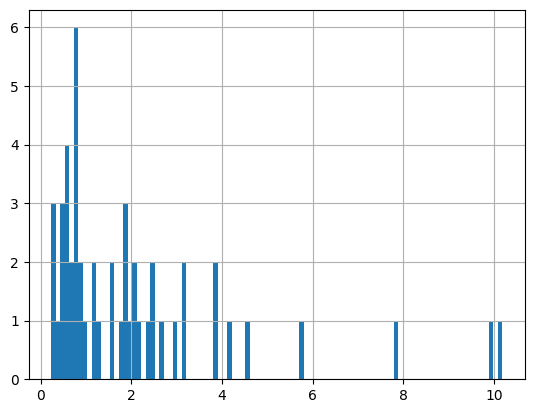

In [15]:
only_variance.hist(bins=100)

In [16]:
print(len(group1), len(group2), len(group3), len(group4), len(group5))
print(sum([len(group1), len(group2), len(group3), len(group4), len(group5)]))

22 13 9 3 3
50


[]

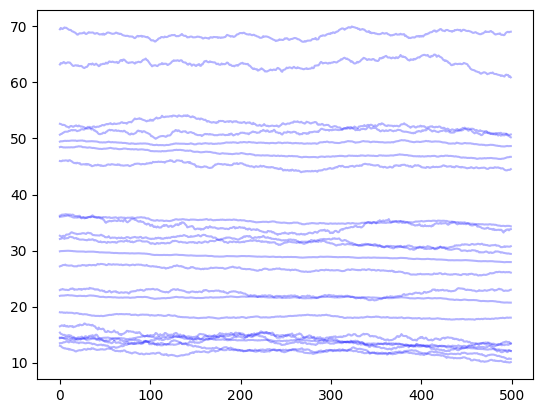

In [17]:
for i in group1:
    plt.plot(data_0_500[i], color='blue', alpha=0.3)
plt.plot()

In [18]:
# Train 5 separate models
data_by_group = [data_scaled_full[group1], data_scaled_full[group2], data_scaled_full[group3], data_scaled_full[group4], data_scaled_full[group5]]

data_train = data_by_group[0][:250].T
data_test = data_by_group[0][250:].T

model1 = Sequential([
    Input(shape=(250, 1)),
    Bidirectional(LSTM(250, return_sequences=True, activation='tanh')),  # Changed to Bidirectional LSTM
    Dropout(0.2),
    LSTM(250, return_sequences=True, activation='tanh'),  # Last LSTM layer might not return sequences
    Dense(1, activation='linear'),  # Ensure output layer has linear activation
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mean_squared_error')
model1.fit(data_train, data_test, epochs=100, batch_size=32)
model1.summary()

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 1.0235
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.0914
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8981
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8912
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9074
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8980
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8742
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8500
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8328
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8233
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8221
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8216
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8166
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.8055
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7968
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 250, 500)       │       504,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250, 500)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 250, 250)       │       751,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250, 1)         │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,765,755 (14.37 MB)

 Trainable params: 1,255,251 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,510,504 (9.58 MB)

In [19]:
predictions = model1.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
predictions_transposed

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.413372,-0.098540,-0.067660,-0.100749,0.004739,-0.092851,-0.102554,-0.102149,-0.095107,-0.083351,...,-0.101733,0.018131,-0.089169,-0.088225,-0.098098,-0.090490,-0.096862,-0.095548,0.341340,-0.103869
1,0.607202,-0.149296,-0.102710,-0.152016,0.016859,-0.142320,-0.154563,-0.154780,-0.144708,-0.129484,...,-0.154197,0.024894,-0.137931,-0.135202,-0.149274,-0.136348,-0.152330,-0.145094,0.489374,-0.156955
2,0.661534,-0.190399,-0.137468,-0.190910,0.016472,-0.181784,-0.193667,-0.195360,-0.183502,-0.169044,...,-0.195151,0.017225,-0.177176,-0.174617,-0.189935,-0.173713,-0.197872,-0.184302,0.512907,-0.196527
3,0.651643,-0.227372,-0.173051,-0.224793,0.008279,-0.214230,-0.227698,-0.229235,-0.214456,-0.204971,...,-0.230156,0.008749,-0.212129,-0.210433,-0.224871,-0.205135,-0.235835,-0.219968,0.478185,-0.229931
4,0.620135,-0.260766,-0.207175,-0.256375,-0.002399,-0.243661,-0.258880,-0.257999,-0.242418,-0.238394,...,-0.260952,0.001015,-0.244784,-0.243801,-0.255672,-0.231267,-0.269139,-0.252835,0.423321,-0.259296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-0.613051,-1.321115,-2.446769,-1.302069,-0.407154,-1.803222,-2.261534,-1.438974,-1.210436,-2.468297,...,-1.657750,-1.310012,-1.793606,-1.996948,-2.601925,-1.723183,-1.473717,-1.402650,-1.550000,-0.760095
246,-0.611507,-1.320953,-2.467811,-1.313283,-0.313652,-1.799949,-2.234472,-1.438307,-1.223656,-2.464272,...,-1.652356,-1.340430,-1.813863,-2.008598,-2.605715,-1.723596,-1.450722,-1.398457,-1.502510,-0.688787
247,-0.612564,-1.316770,-2.484142,-1.323364,-0.210058,-1.794762,-2.202752,-1.428239,-1.239543,-2.453697,...,-1.639290,-1.323402,-1.830203,-2.007042,-2.594205,-1.705397,-1.420795,-1.388306,-1.460914,-0.605849
248,-0.617682,-1.302911,-2.500064,-1.328364,-0.094578,-1.782536,-2.148690,-1.408846,-1.222890,-2.440028,...,-1.620094,-1.274171,-1.846126,-1.992785,-2.576960,-1.679506,-1.381183,-1.378285,-1.432181,-0.508840


In [20]:
# Predict
predictions = model1.predict(data_train).squeeze()
predictions_transposed = pd.DataFrame(predictions.T)
predictions_transposed.columns = group1
predictions_transposed.index = [i for i in range(250, 500)]
predictions_transposed.head(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


,0,2,5,6,8,12,14,16,17,18,...,27,28,29,30,38,39,40,42,45,47
250,0.413372,-0.098540,-0.06766,-0.100749,0.004739,-0.092851,-0.102554,-0.102149,-0.095107,-0.083351,...,-0.101733,0.018131,-0.089169,-0.088225,-0.098098,-0.090490,-0.096862,-0.095548,0.341340,-0.103869
251,0.607202,-0.149296,-0.10271,-0.152016,0.016859,-0.142320,-0.154563,-0.154780,-0.144708,-0.129484,...,-0.154197,0.024894,-0.137931,-0.135202,-0.149274,-0.136348,-0.152330,-0.145094,0.489374,-0.156955


In [21]:
data_train_t = pd.DataFrame(data_train.T)
compare = pd.concat([data_train_t, predictions_transposed], axis='rows')

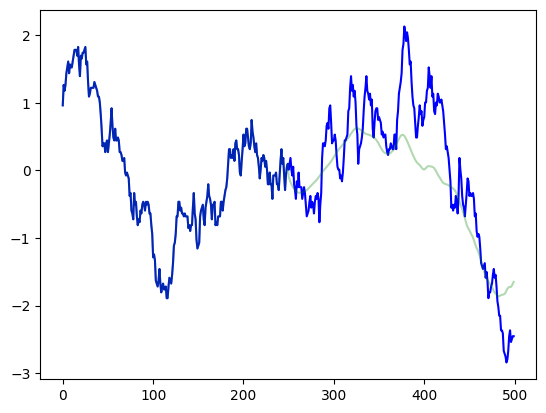

In [58]:
stock_number = 17
plt.plot(data_scaled_full[group1[stock_number]], color='blue', label='Real Stock Price')
plt.plot(compare[group1[stock_number]], color='green', label='Predicted Stock Price', alpha = 0.3)

In [27]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [78]:
stock_number = group1[10]
stock_data = pd.DataFrame(data_0_500[stock_number])

In [81]:
# Add technical indicators
stock_data['SMA_20'] = stock_data[stock_number].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data[stock_number].rolling(window=50).mean()
stock_data['SMA_100'] = stock_data[stock_number].rolling(window=100).mean()
stock_data['RSI'] = 100 - (100 / (1 + (stock_data[stock_number].pct_change(1).rolling(window=14).mean() / 100)))
stock_data['MACD'] = stock_data[stock_number].ewm(span=12, adjust=False).mean() - stock_data[stock_number].ewm(span=26, adjust=False).mean()
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()


<Axes: >

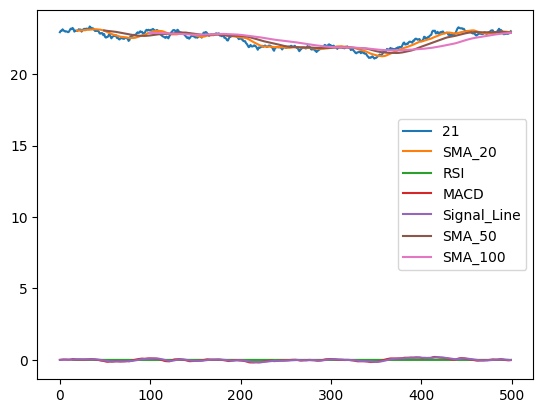

In [82]:
stock_data.plot()

In [84]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    
    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat
